---
title: "Sampling Methods"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-13"
categories: [python, datacamp, statistics, machine learning, sampling ]
image: "samplingMethods.jpg"

---

# Sampling Methods

It’s time to get hands-on and perform the four random sampling methods in Python: simple, systematic, stratified, and cluster.

This **Sampling Methods** is part of [Datacamp course: Introduction to sampling](https://app.datacamp.com/learn/courses/sampling-in-python)

This is my learning experience of data science through DataCamp

In [1]:
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
import numpy as np

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

## Simple random and systematic sampling

Although there are several sampling methods such as:
* Simple random sampling
* Systematic random sampling
* Stratified & weight random sampling
* Cluster sampling

* Simple random sampling: Work like raffle or lottery & consider simplest method of sampling a population. involves picking rows at random, one at a time, where each row has the same chance of being picked as any other
* Systematic random sampling: This samples the population at regular intervals and this method avoid randomness

### Simple random sampling

In [2]:
attrition_pop=pd.read_feather('dataset/attrition.feather')
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [3]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

### Systematic random sampling

In [4]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

### Do you think systematic sampling is appropriate?

In the case of systematic sampling, there is a problem: if the data has been sorted or there is a pattern or meaning behind the row order, then the resulting sample may not be representative of the entire population. If the rows are shuffled, the problem can be solved, but then systematic sampling becomes equivalent to simple random sampling.

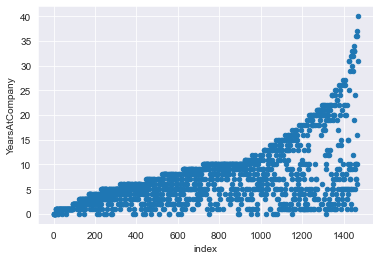

In [5]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index',y='YearsAtCompany',kind='scatter')
plt.show()

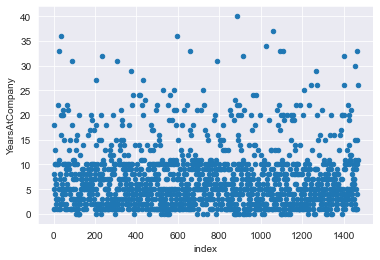

In [6]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index',y='YearsAtCompany',kind='scatter')
plt.show()

### Stratified and weighted random sampling

Stratified sampling is a technique that allows us to sample a population that contains subgroups

* Weighted random sampling

A close relative of stratified sampling that provides even more flexibility is weighted random sampling. In this variant, we create a column of weights that adjust the relative probability of sampling each row.

### Sampling by proportional stratification

You may need to carefully control the counts of each subgroup within the population if you are interested in subgroups within the population. As a result of proportional stratified sampling, the subgroup sizes within the sample are representative of the subgroup sizes within the population as a whole.

In [7]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [8]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)

# Print the sample
print(attrition_strat)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Development   
177    29        0.0      Travel_Rarely        738  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [10]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)
print('\nBy grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.')

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.


### A stratified sampling method based on equal counts

When one subgroup is larger than another in the population, but you do not want to factor this difference into your analysis, you can use equal counts stratified sampling to generate samples in which each subgroup has the same amount of data.

In [11]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n=30, random_state=2022)

# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [12]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


### Weighted sampling

The stratified sampling method determines the probability of picking rows from your dataset based on the subgroups within your dataset. A generalization of this is weighted sampling, which allows you to specify rules regarding the probability of selecting rows at the row level. A row's probability of being selected is proportional to its weight value.

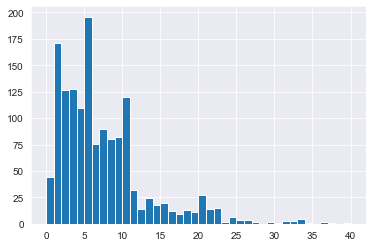

In [13]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

In [14]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights='YearsAtCompany')

# Print the sample
print(attrition_weight)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
853    36        0.0      Travel_Rarely        172  Research_Development   
481    34        0.0  Travel_Frequently        618  Research_Development   
1148   38        0.0      Travel_Rarely       1321                 Sales   
1430   51        0.0  Travel_Frequently        237                 Sales   
517    39        0.0      Travel_Rarely        835  Research_Development   
...   ...        ...                ...        ...                   ...   
1351   45        0.0      Travel_Rarely       1038  Research_Development   
1412   54        0.0      Travel_Rarely        971  Research_Development   
1248   47        0.0  Travel_Frequently       1379  Research_Development   
1210   36        0.0  Travel_Frequently        688  Research_Development   
1328   55        0.0  Travel_Frequently       1091  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
853    

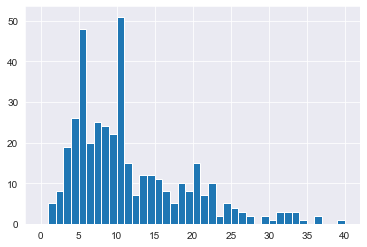

In [15]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

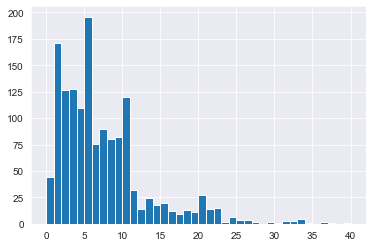

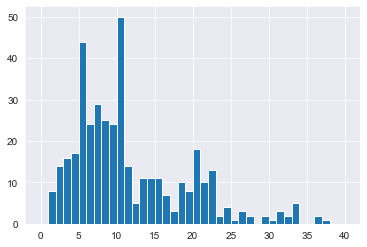

In [16]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

### Cluster sampling

Stratified sampling vs. cluster sampling
* Stratified sampling:
    * Split the population into subgroups
    * Use simple random sampling on every subgroup
* Cluster sampling
    * Use simple random sampling to pick some subgroups
    * Use simple random sampling on only those subgroups

In [18]:
import random
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop,k=4)

# Print the result
print(job_roles_samp)

['Research_Director', 'Sales_Executive', 'Sales_Representative', 'Laboratory_Technician']


In [19]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1      19        1.0      Travel_Rarely        528                 Sales   
2      18        1.0      Travel_Rarely        230  Research_Development   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
7      18        1.0         Non-Travel        247  Research_Development   
...   ...        ...                ...        ...                   ...   
1457   55        0.0      Travel_Rarely        692  Research_Development   
1458   56        0.0  Travel_Frequently        906                 Sales   
1459   54        0.0      Travel_Rarely        685  Research_Development   
1467   58        0.0      Travel_Rarely        682                 Sales   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1      

In [21]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10,random_state=2022)

# Print the sample
print(attrition_clust)

print("\n The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.")

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1124   36        0.0      Travel_Rarely       1396  Research_Development   
576    45        0.0      Travel_Rarely        974  Research_Development   
995    42        0.0  Travel_Frequently        748  Research_Development   
1243   50        0.0      Travel_Rarely       1207  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
599    33        0.0      Travel_Rarely       1099  Research_Development   
117    24        0.0      Travel_Rarely        350  Research_Development   
472    30        0.0      Travel_Rarely        921  Research_Development   
149    27        0.0         Non-Travel       1277  Research_Development   
49     20        1.0      Travel_Rarely        129  Research_Development   
1302   40        0.0      Travel_Rarely       1416  Research_Development   
1126   42        0.0      Travel_Rarely        810  Research_Development   
1216   38   

C:\Users\dghr201\AppData\Local\Temp\ipykernel_28748\2564666783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


### 3 kinds of sampling

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples

In [23]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=1/4, random_state=2022)
attrition_srs.shape

(368, 31)

In [24]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=1/4, random_state=2022)
attrition_strat.shape

(368, 31)

In [26]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition_pop) // 4, random_state=2022)

C:\Users\dghr201\AppData\Local\Temp\ipykernel_28748\1225069142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


ValueError: Cannot take a larger sample than population when 'replace=False'

### Comparing point estimates

In [27]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [28]:
# Calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [29]:
# Calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [30]:
# Calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.090909
Medium       0.500000
High         0.125000
Very_High    0.307692
Name: Attrition, dtype: float64
